## 22-3. Pose 는 face landmark 랑 비슷해요

사실 우리는 이미 2D pose estimation 을 다룬 적이 있다. face landmark 와 매우 비슷하다.
딥러닝이나 사람의 시각에서도 실제로도 매우 비슷한 애플리케이션이다. 입력과 출력이 개수만 다를 뿐 상당히 비슷하다.

하지만 난이도에서 차이가 난다.
face landmark 는 물리적으로 거의 고정되어 있는 (입이 얼굴보다 클 수 없는 걸 생각해 보자😃) 반면, human pose 는 팔, 다리가 상대적으로 넓은 범위와 자유도를 갖는다는 것을 고려해야 한다.

자유도가 높다는 것은 데이터 분포를 특정하기 어렵다고 표현할 수 있을 것 같다. 데이터 분포를 학습하기 어렵다면 당연히 학습에 더 많은 데이터가 필요하고 더 복잡한 모델을 사용해야 한다는 것을 의미한다.

따라서 상당히 많은 사전 작업이 요구되고 사용하려는 애플리케이션에 따라 접근 방법도 달라진다.

가장 초기에 만나는 접근법은 두 가지로 나눠질 수 있다.

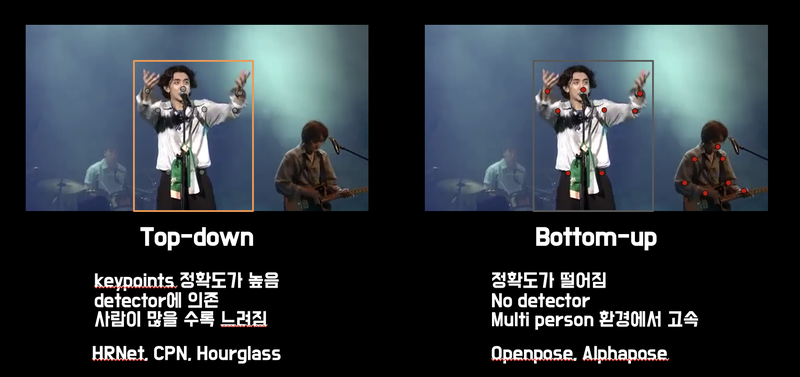

첫 번째 방법은 **Top-down** 방법이다.

- 모든 사람의 정확한 keypoint 를 찾기 위해 object detection 을 사용합니다.
- crop 한 이미지 내에서 keypoint 를 찾아내는 방법으로 표현합니다.
- detector가 선행되어야 하고 모든 사람마다 알고리즘을 적용해야 하기 때문에 사람이 많이 등장할 때는 느리다는 단점이 있습니다.

두 번째 방법은 **Bottom-up** 방법입니다.

- detector가 없고 keypoint 를 먼저 검출합니다.
  
      예를 들어 손목에 해당하는 모든 점들을 검출합니다.
    
- 한 사람에 해당하는 keypoint 를 clustering 합니다.
- detector 가 없기 때문에 다수의 사람이 영상에 등장하더라도 속도 저하가 크지 않습니다. 반면 top down 방식에 비해 keypoint 검출 범위가 넓어 성능이 떨어진다는 단점이 있습니다.

## 22-4. human keypoint detection

**deformable part model**
        
        각 부분(part) 들의 complex joint relationship 의 mixture model 로 keypoint 를 표현하는 방법을 이용

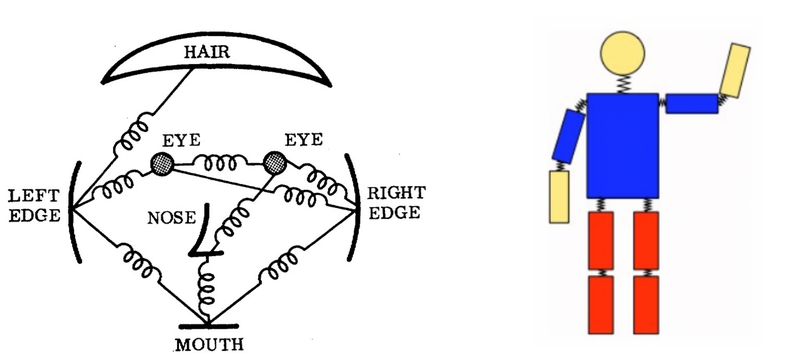

https://www.cs.cmu.edu/~deva/papers/pose_pami.pdf


**DeepPose**

    AlexNet 이후, 다양한 분야에 CNN 이 적용되면서 pose estimation 분야에도 CNN 을 이용한 방법이 나타나기 시작했다. Toshev and Szegedy 는 처음으로 딥러닝 기반 keypoint localization 모델을 제안
    
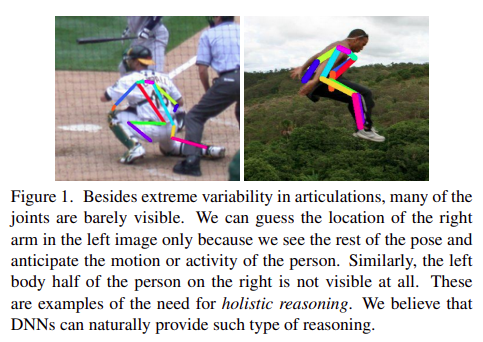

https://arxiv.org/pdf/1312.4659.pdf


**Efficient Object Localization Using Convolutional Network**

    이 논문에서는 제안했던 모델도 DeepPose 에 비해 깊어졌지만, 가장 중요한 건 keypoint의 위치를 직접 예측하기보다 keypoint가 존재할 확률 분포를 학습하게 하자는 점
    
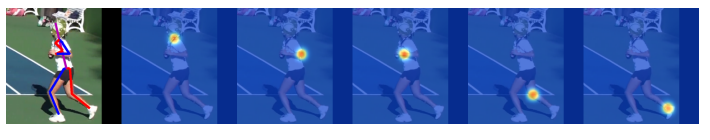
   
    human pose (keypoint) 도 사람이 labeling 을 할 수밖에 없는데 사람이 항상 같은 위치의 점을 찍을 수 있을까?
       
    자연상태에서 일어나는 확률 분포는 가우시안 분포일 가능성이 크다. Tompson 은 이런 점에 착안하여 label 을 (x,y) 좌표에서 (x,y) 를 중심으로 하는 heatmap 으로 변환했다. 딥러닝 모델은 이 heatmap 을 학습하게 되는 것이다. "keypoint 가 존재할 확률" 을 학습하게 된 이후로 성능이 비약적으로 향상되는 모습을 볼 수 있다.

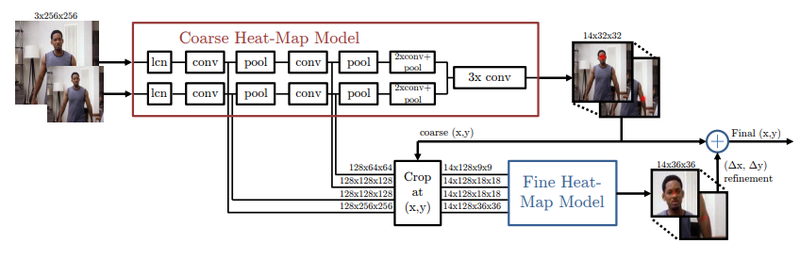

https://arxiv.org/pdf/1411.4280.pdf

       Tompson이 제안한 모델은 Coarse model 과 fine model 로 나누어진다.
       
       coarse model 에서 32x32 heatmap 을 대략적으로 추출한 후 multi resolution 입력을 coarse heatmap 기준으로 crop 한 뒤 fine model 에서 refinement 를 수행한다.
       
**Convolutional Pose Machines(CPM)**

    CVPR 2016에서 발표된 CPM 은 completely differentiable 한 multi-stage 구조를 제안했다. multi stage 방법들은 DeepPose 에서부터 지속적으로 사용되어 왔었다.
    
    하지만 crop 연산 등 비연속적인 미분 불가능한 stage 단위로 나눠져 있었기 때문에 학습 과정을 여러 번 반복하는 비효율적인 방법을 사용해왔다.
    
    CPM 은 end-to-end 로 학습할 수 있는 모델을 제안
    
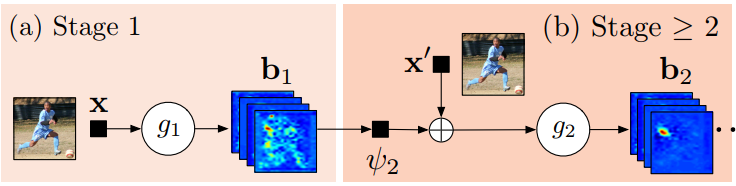

    Stage 1 은 image feature 를 계산하는 역할을 하고 stage 2는 keypoint 를 예측하는 역할. g1과 g2 모두 heatmap 을 출력하게 만들어서 재사용이 가능한 부분은 weight sharing 할 수 있도록 세부 모델을 설계.

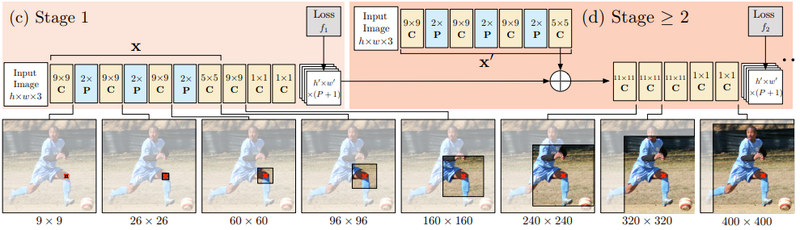

    Stage ≥ 2 에서 볼 수 있듯이 stage 2 이상부터는 반복적으로 사용. 보통은 3개의 스테이지를 사용. stage 1 구조는 고정이고 stage 2 부터는 stage 2 구조를 반복해서 추론. stage 2 부터는 입력이 heatmap(image feature)이 되기 때문에 stage 단계를 거칠수록 keypoint가 refinement 되는 효과를 볼 수 있다.
    
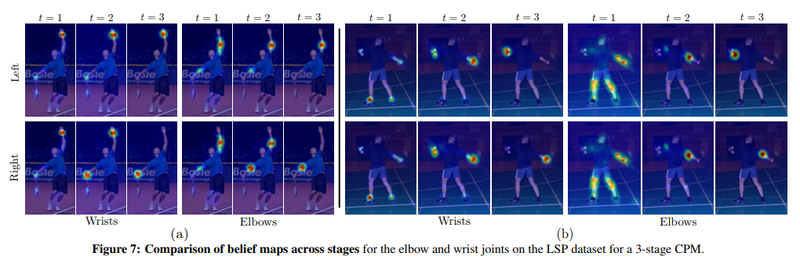

    사실 CPM 이 아주 좋은 방법이라고는 말하기 어렵다. Multi-stage 방법을 사용하기 때문에 end-to-end 로 학습이 가능하더라도 그대로 학습하는 경우는 높은 성능을 달성하기 어렵다. 따라서 stage 단위로 pretraining 을 한 후 다시 하나의 모델로 합쳐서 학습을 한다. 논문을 작성하기 위해서라면 충분히 감내할 수 있지만 서비스 측면에서 바라본다면 불편한 요소라고 할 수 있다. 이런 문제점들은 후에 제안되는 모델들이 적극적으로 개선하고 있다.

    CPM 을 다루는 이유는 성능 때문이다. receptive field 를 넓게 만드는 multi stage refinement 방법이 성능 향상에 크게 기여한 것 같다.

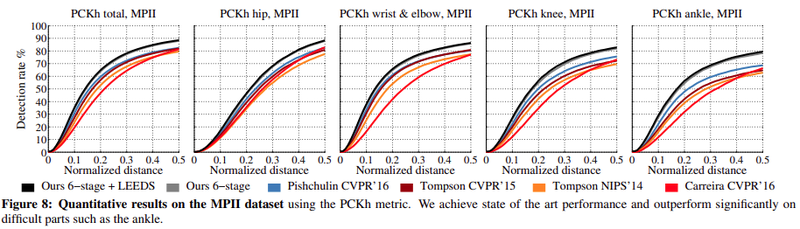

https://arxiv.org/pdf/1602.00134.pdf

**Stacked Hourglass Network** <- 실습에서 사용

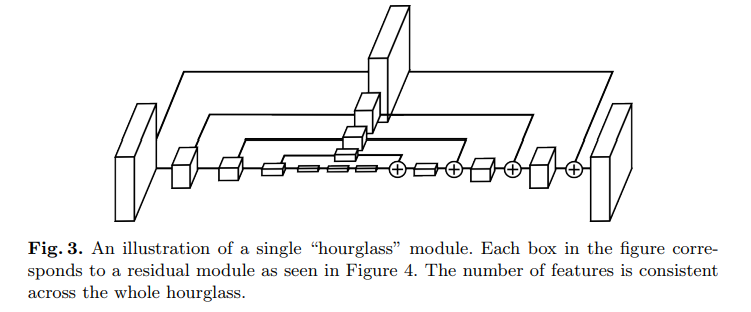

    Stacked Hourglass Network 의 기본 구조는 모래시계 같은 모양으로 만들어져 있다. Conv layer 와 pooling 으로 이미지(또는 feature) 를 인코딩 하고 upsampling layer 를 통해 feature map 의 크기를 키우는 방향으로 decoding 한다. feature map 크기가 작아졌다 커지는 구조여서 hourglass 라고 표현한다.

    기존 방법들과의 가장 큰 차이점은

    1. feature map upsampling
    
    2. residual connection

    pooling으로 image의 global feature를 찾고 upsampling으로 local feature를 고려하는 아이디어가 hourglass의 핵심 novelty라고 할 수 있다.

    hourglass의 모델 구조를 보면 U-Net과 비슷해 보인다. 실제로 비슷하다
    
    Hourglass는 이 간단한 구조를 여러 층으로 쌓아올려서 (stacked) human pose estimation의 성능을 향상시켰다.
    
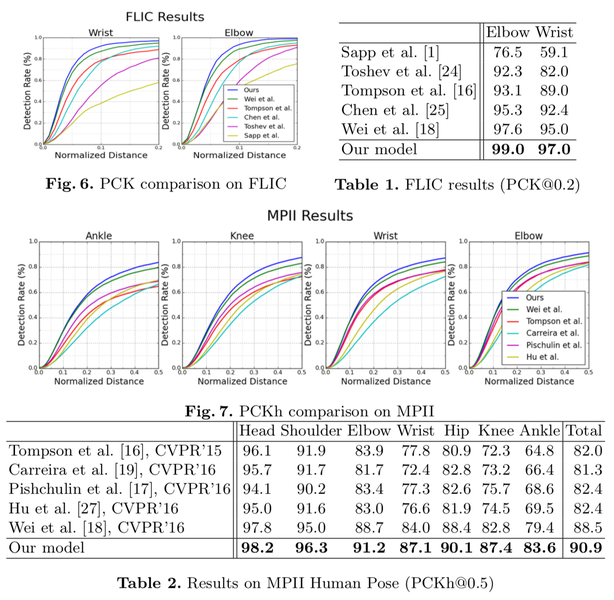

https://arxiv.org/pdf/1603.06937.pdf


**SimpleBaseline** <- 실습에서 사용

    "기술 자체가 많이 발전했는데 현재의 간단한 모델은 얼마나 성능이 좋을까?"
    SimpleBaseline의 저자는 정말 아주 간단한 encoder-decoder 구조를 설계했다.

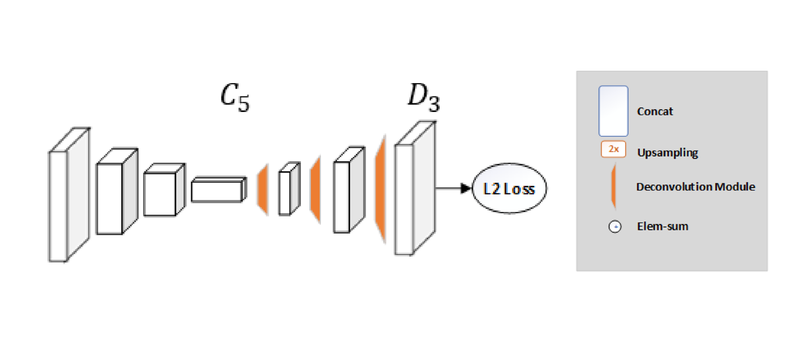

    그리고 이 구조로 무려 '73.7%' 의 AP 를 COCO 에서 달성한다. 직전 연도(2017년) 의 72.1% 결과를 뛰어넘는 수치이다.
    
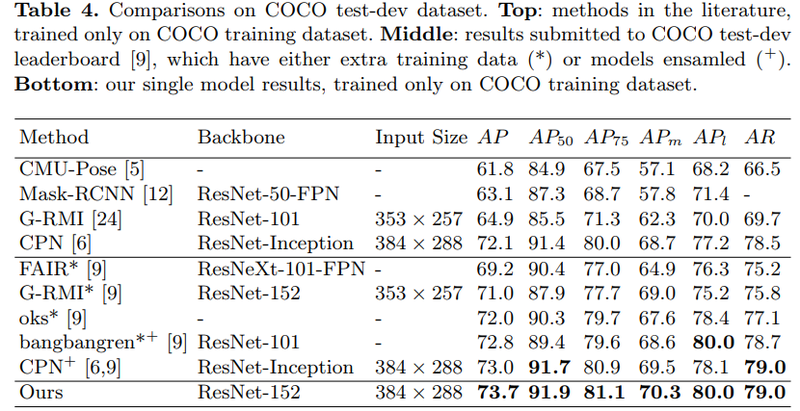

    직전 방법인 hourglass 와 직접 비교해 보면, 아래와 같은 결과가 나온다고 한다.
    
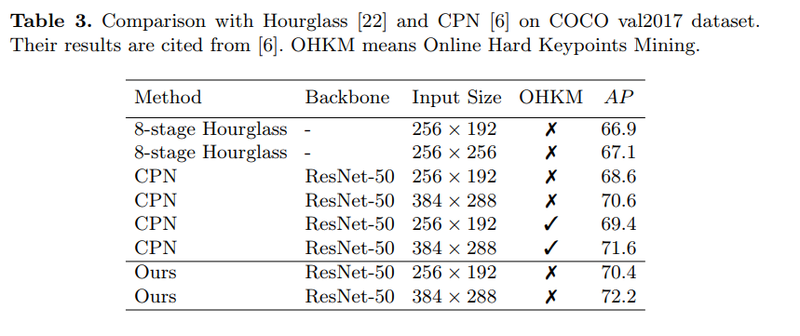

    resnet 50 만 사용한 간단한 구조가 hourglass 와 같은 SOTA(state-of-the-art) 를 이겼다는 것에 큰 놀라움을 선물한 논문이다.

    참고로 CPN 은 이전에 소개한 Convolutional Pose Machine 이 아닌 Cascaded Pyramid Network 라는 모델이다. 자세히 소개 드리지는 않지만 skip connection 이 stage 사이에 연결되어 있다는 정도로 이해하고 넘어가시면 좋을 것 같다.

https://arxiv.org/pdf/1804.06208.pdf

**Deep High-Resolution Network (HRNet)**

    HRNet 은 개발된 이후 현재까지도 SOTA 에 가까운 성능을 보일 정도로 성능이 좋은 알고리즘이다. Simplebaseline의 1저자가 참여해 연구한 모델이기 때문에 Simplebaseline과 같은 철학을 공유.

    Stacked hourglass, Casecaded pyramid network 등은 multi-stage 구조로 이루어져 있어서 학습 & 추론 속도가 느리다는 큰 단점이 있다. (대신 하이퍼파라미터를 최적화할 경우 1-stage 방법보다 성능이 좋다.)
    
    반면 Simplebaseline 과 HRNet은 간단함을 추구하는 만큼 1-stage 를 고수. 덕분에 구조도 간결해지고 사용하기도 쉽다.

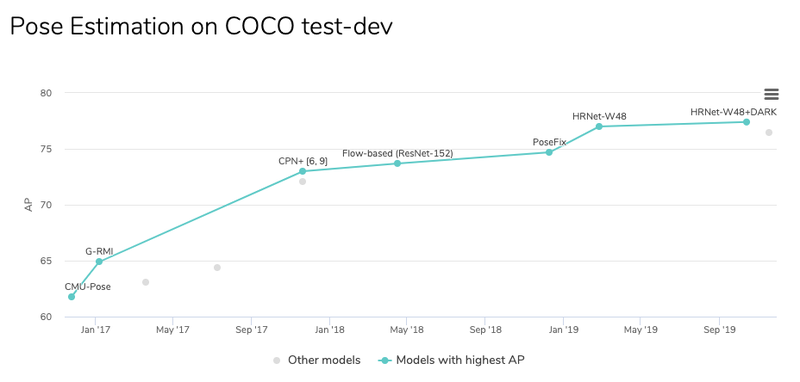

    1-stage 에서 어떻게 모델을 변화 시켰을까? 기존 알고리즘들을 먼저 살펴보겠다.
    
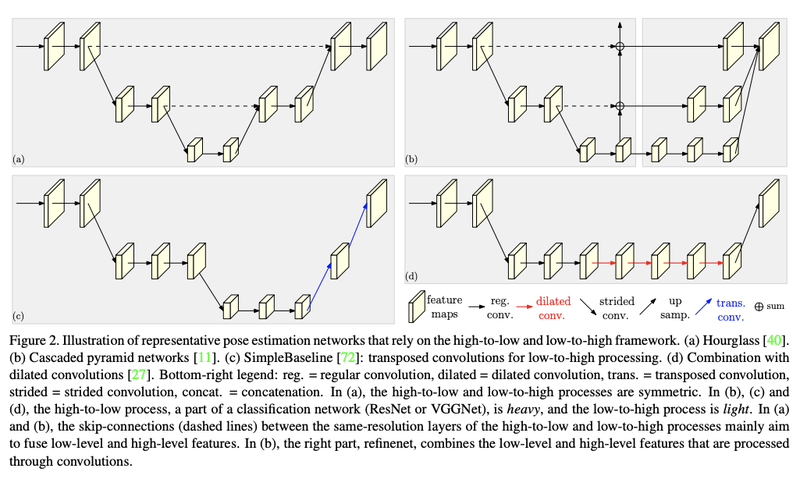

(a) : Hourglass
(b) : CPN(cascaded pyramid networks)
(c) : SimpleBaseline - transposed conv
(d) : SimpleBaseline - dilated conv

    공통점 : high resolution → low resolution 인 encoder 와 low → high 인 decoder 구조로 이루어진 점
    
    차이점 : Hourglass 는 encoder 와 decoder 의 비율이 거의 비슷함(대칭적임). 반면 Simplebaseline 은 encoder 가 무겁고 (resnet50 등 backbone 사용) decoder 는 가벼운 모델을 사용함. (a), (b) 는 skip connection 이 있지만 (c) 는 skip connection 이 없다.
    
    Simplebaseline에서는 skip connection 사용 x?
    
        ㄴHRNet 저자도 앞의 질문들에 대해 고민을 했다. high → low → high 의 구조에서 high resolution 정보(representation)을 유지할 수 있는 모델을 어떻게 만들 수 있을까?
        
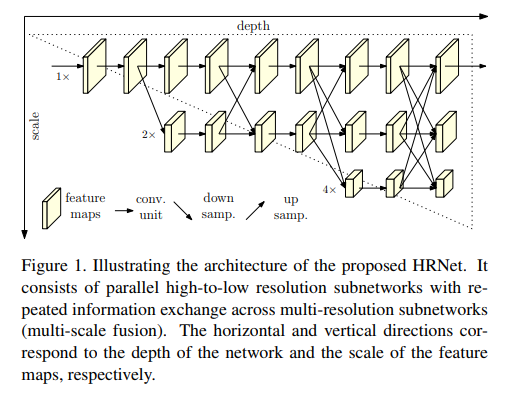

    고민의 결과, down sample layer를 만들고 작아진 layer feautre 정보를 다시 up sampling해서 원본 해상도 크기에 적용하는 모델을 제안. 다소 복잡해 보이지만 1-stage로 동작하기 때문에 전체 flow를 보면 엄청 간단. 우리가 앞에서 다뤘던 CPM이나 Hourglass는 중간 단계에서의 heatmap supervision이 학습과정에 꼭 필요했는데 HRNet 은 필요가 없다!!

    구현도 Simplebaseline의 backbone인 Resnet을 HRNet으로 교체만 해주면 되기 때문에 사용하기도 굉장히 편리하다.

    HRNet 또한 이전 알고리즘 들과 마찬가지로 heatmap을 regression하는 방식으로 학습하고 MSE loss를 이용한다. (특히 Simplebaseline 과 거의 유사.)
    
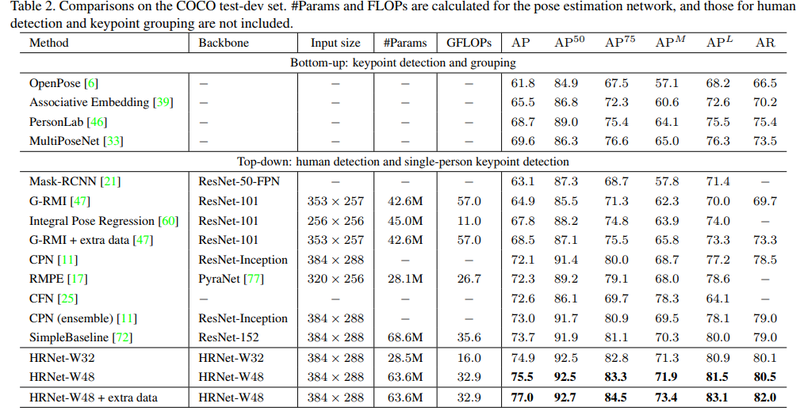

    앞에서 다뤘던 Simplebaseline 이 보인다. 잠깐 언급된 CPN 도 보인다. AP 성능을 보면 HRNet 이 4% 에 가까운 비약적인 성능 향상을 이뤄냈다.

    비교적 학습이 간단하면서 성능까지 좋은 모델이어서 현재도 많이 사용되고 있다. 특히 원저자의 PyTorch 코드가 매우 깔끔하게 구현되어 있고 재생산성이 높아 사용하기 좋다.